In [1]:
import os
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator-image augmentation,image zoom,image flip
# Imports the Model class from Keras, which is used to create a Keras model.
# Imports the VGG16 model from Keras, which is a pre-trained convolutional neural network.
#  Imports the ImageDataGenerator class from Keras, which is used to augment image data.

import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=[224,224]
# i/p image size of vgg16
# Defines a variable IMAGE_SIZE and sets it to [224, 224], representing the width
# and height of the input images that will be used with the VGG16 model.


In [3]:
train_path='/content/drive/MyDrive/Deep_Learning/dataset/dataset'
test_path='/content/drive/MyDrive/Deep_Learning/dataset/dataset'

In [4]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
# conv layer,max_pooling are only used from fully connected
# download weight from imagenet

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


weights of conv and max pooling must not be updated

In [5]:
# must do
for layer in vgg.layers:
  layer.trainable=False

: Imports the Dense and Flatten layers from Keras, which are used to build neural networks.

In [6]:
# vgg.output o/p variable(o/p of conv + max pooling)
x=Flatten()(vgg.output)

# fully connected layer is not used here
# x1=Dense(10,activation='relu')(x)
# x2=Dense(10,activation='relu')(x1)
# prediction=Dense(2,activation='softmax')(x2)
# o/p layer
prediction=Dense(2,activation='softmax')(x)

In [7]:
model=Model(inputs=vgg.input,outputs=prediction)

In [8]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │          50,178 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

only trainable 50178 nodes

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
# Image preprocessing use image data generator
train_datagen=ImageDataGenerator(rescale=1/255,zoom_range=0.2,horizontal_flip=True)
# specifies what to do with the image while training
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')


Found 1368 images belonging to 2 classes.
Found 1368 images belonging to 2 classes.


it automatoically read the classes as 0 and 1 randomly
so both training and testing folder should have same folders name in order to classify classessin the same manner

In [11]:
r=model.fit(training_set,validation_data=test_set,epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 643s 15s/step - accuracy: 0.7001 - loss: 0.8702 - val_accuracy: 0.9868 - val_loss: 0.0426
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 32s 743ms/step - accuracy: 0.9936 - loss: 0.0380 - val_accuracy: 0.9985 - val_loss: 0.0162
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 32s 743ms/step - accuracy: 0.9971 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 0.0107
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 45s 835ms/step - accuracy: 0.9979 - loss: 0.0159 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 37s 742ms/step - accuracy: 0.9994 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 0.0062


In [12]:
r.history

{'accuracy': [0.8486841917037964,
  0.9941520690917969,
  0.9985380172729492,
  0.9978070259094238,
  0.9985380172729492],
 'loss': [0.39183253049850464,
  0.02998296543955803,
  0.01862064003944397,
  0.015731245279312134,
  0.012103145942091942],
 'val_accuracy': [0.9868420958518982, 0.9985380172729492, 1.0, 1.0, 1.0],
 'val_loss': [0.04263985529541969,
  0.01617003232240677,
  0.010664902627468109,
  0.008275410160422325,
  0.006197853945195675]}

training data-accuracy,loss
validation data-accuracy,loss

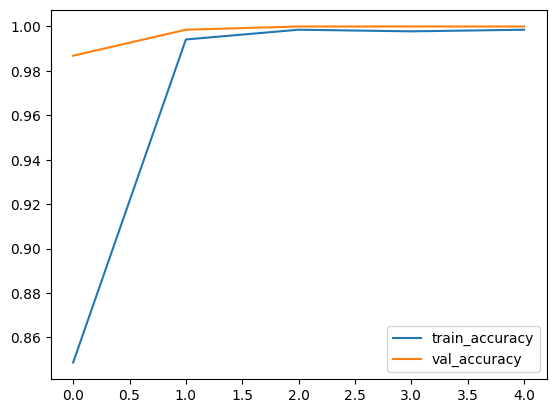

In [13]:

plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

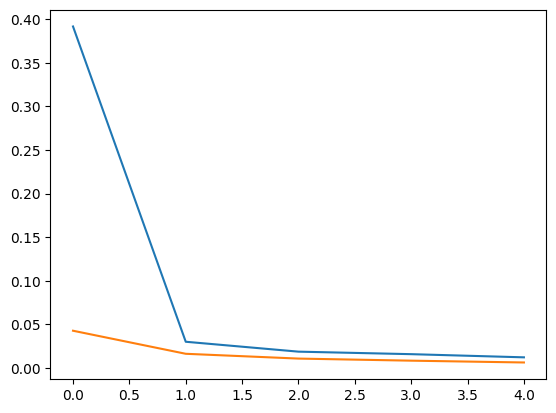

In [14]:
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')

In [ ]:
model.save('model_transformer_learning.h5')

In [41]:

from skimage.io import imread,imshow
from skimage.transform import resize

# from google.colab.patches import cv2_imshow
# inorder to use imshow,above import is required
def predict_new(image_path,model):
  img=imread(image_path)
  img1=resize(img,(224,224))
  # print(img1.shape)
  img1=img1.reshape(1,224,224,3)
  pred=model.predict(img1)
  # print(pred)
  ind=pred.argmax()
  # print(ind)
  datadir=os.listdir('/content/drive/MyDrive/Deep_Learning/dataset/dataset')
  datadir.sort()
  print(datadir[ind])


  # resize and normalisation in a single step

In [42]:
image_path='/content/drive/MyDrive/Deep_Learning/dataset/dataset/with_mask/100-with-mask.jpg'
predict_new(image_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
with_mask
